<a href="https://colab.research.google.com/github/Saishab/Machine-Learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [2]:
import pandas as pd

# GitHub URL for the Titanic dataset
url = "https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [5]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64


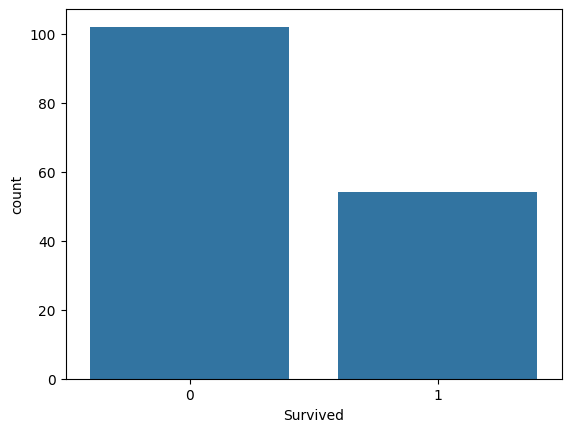

In [6]:
# Visualizing data
sns.countplot(x='Survived', data=df)
plt.show()

**Preprocess the Data**

In [11]:
# Fill missing values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Drop irrelevant columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [18]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
# Convert categorical columns into numeric
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [20]:
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [21]:
# Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
scaler

StandardScaler()

In [27]:
X_train.shape

(124, 8)

In [28]:
X_test.shape

(32, 8)

**Train and Evaluate Models**

In [29]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.71875


In [30]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dtree))

Decision Tree Accuracy: 0.75


In [31]:
# Random Forest Classifier
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
y_pred_rforest = rforest.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rforest))

Random Forest Accuracy: 0.84375


In [32]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.71875


In [33]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.78125


**Confusion Matrix and Classification Report**

In [34]:
# Display confusion matrix and classification report for each model
models = {'Logistic Regression': logreg, 'Decision Tree': dtree,
          'Random Forest': rforest, 'SVM': svm, 'KNN': knn}

for name, model in models.items():
    print(f'Classification Report for {name}:')
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('-'*50)


Classification Report for Logistic Regression:
[[17  4]
 [ 5  6]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.60      0.55      0.57        11

    accuracy                           0.72        32
   macro avg       0.69      0.68      0.68        32
weighted avg       0.71      0.72      0.72        32

--------------------------------------------------
Classification Report for Decision Tree:
[[17  4]
 [ 4  7]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.64      0.64      0.64        11

    accuracy                           0.75        32
   macro avg       0.72      0.72      0.72        32
weighted avg       0.75      0.75      0.75        32

--------------------------------------------------
Classification Report for Random Forest:
[[20  1]
 [ 4  7]]
              precision    recall  f1-score   support

   

**Compare the Algorithms**

In [35]:
# Compare accuracy of all models
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_logreg),
    'Decision Tree': accuracy_score(y_test, y_pred_dtree),
    'Random Forest': accuracy_score(y_test, y_pred_rforest),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'KNN': accuracy_score(y_test, y_pred_knn)
}

for model, score in accuracy_scores.items():
    print(f'{model}: {score}')


Logistic Regression: 0.71875
Decision Tree: 0.75
Random Forest: 0.84375
SVM: 0.71875
KNN: 0.78125


**Confusion Matrix, Classification Report, and Performance Metrics**

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize dictionaries to store the performance metrics
performance_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Evaluate models and store metrics
models = {'Logistic Regression': logreg, 'Decision Tree': dtree,
          'Random Forest': rforest, 'SVM': svm, 'KNN': knn}

for name, model in models.items():
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics
    performance_metrics['Model'].append(name)
    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['Precision'].append(precision)
    performance_metrics['Recall'].append(recall)
    performance_metrics['F1 Score'].append(f1)

    # Display results
    print(f'{name} Performance:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(confusion_matrix(y_test, y_pred))
    print('-' * 50)


Logistic Regression Performance:
Accuracy: 0.7188
Precision: 0.6000
Recall: 0.5455
F1 Score: 0.5714
[[17  4]
 [ 5  6]]
--------------------------------------------------
Decision Tree Performance:
Accuracy: 0.7500
Precision: 0.6364
Recall: 0.6364
F1 Score: 0.6364
[[17  4]
 [ 4  7]]
--------------------------------------------------
Random Forest Performance:
Accuracy: 0.8438
Precision: 0.8750
Recall: 0.6364
F1 Score: 0.7368
[[20  1]
 [ 4  7]]
--------------------------------------------------
SVM Performance:
Accuracy: 0.7188
Precision: 0.6000
Recall: 0.5455
F1 Score: 0.5714
[[17  4]
 [ 5  6]]
--------------------------------------------------
KNN Performance:
Accuracy: 0.7812
Precision: 0.7500
Recall: 0.5455
F1 Score: 0.6316
[[19  2]
 [ 5  6]]
--------------------------------------------------


**Compare the Algorithms with All Metrics**

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression   0.71875   0.600000  0.545455  0.571429
1        Decision Tree   0.75000   0.636364  0.636364  0.636364
2        Random Forest   0.84375   0.875000  0.636364  0.736842
3                  SVM   0.71875   0.600000  0.545455  0.571429
4                  KNN   0.78125   0.750000  0.545455  0.631579


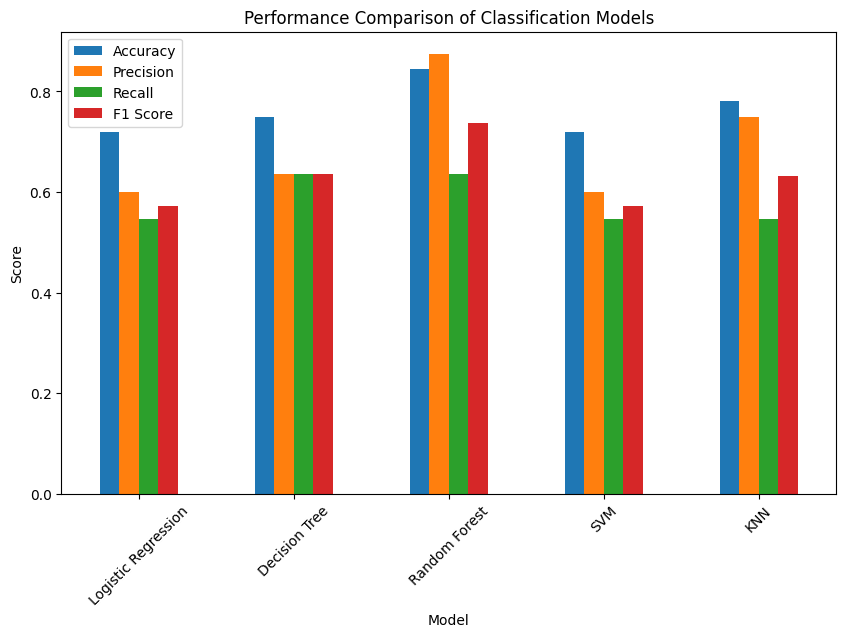

In [37]:
# Convert the performance metrics dictionary into a pandas DataFrame
performance_df = pd.DataFrame(performance_metrics)

# Display the performance comparison table
print(performance_df)

# Optional: Visualize the comparison
performance_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Performance Comparison of Classification Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()
